In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd
plt.style.use('thomas')

/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
import response
plt.style.use('thomas')

Welcome to JupyROOT 6.14/08


In [3]:
continuum_rsp_file = 'response/COSI2016_6deg_10ebins.p1.binnedimaging.imagingresponse.rsp.gz'

In [4]:
test = response.SkyResponse(continuum_rsp_file,
                            pixel_size=6,from_saved_file=False)

In [5]:
test.ReadMEGAlibResponse()

Number of energy bins is 10; the last two entries of the response matrix will be initial and final energy, respectively ...
Interpolationg between data set energy binning and response energy bining happens at a later step!


In [6]:
test.rsp.response.shape

(1145, 30, 1145, 10, 10)

In [7]:
(test.rsp.response.size * test.rsp.response.itemsize)/1024/1024/1024

29.303692281246185

In [8]:
test.RebinToSquarePixelGrid(RegularPixelSize=6.)

Now calculating mapping function ...



Applying mapping function to all response entries, 30 phi bins times 1145 FISBEL bins, i.e. 34350 bins in total ...



Binned sky response contains 143372 (417.3857350800582%) non-zero entries: use reduced data space to save fit in fits!


In [9]:
test.rsp.response_grid_normed.shape

(30, 60, 30, 1145, 10, 10)

In [10]:
(test.rsp.response_grid_normed.size * test.rsp.response_grid_normed.itemsize)/1024/1024/1024

46.06693983078003

In [11]:
test.SaveRegularBinnedMEGAlibResponse('response/RegularResponseGrid_Continuum_10bins_v1.npz')

In [12]:
break

SyntaxError: 'break' outside loop (<ipython-input-12-6aaf1f276005>, line 4)

In [ ]:
"""test2 = response.SkyResponse('response/RegularResponseGrid_Continuum_v1.npz',
                                pixel_size=6,from_saved_file=True)"""

In [ ]:
"""test2.rsp.response_grid_normed.shape"""

Text(0, 0.5, 'zenith [rad]')

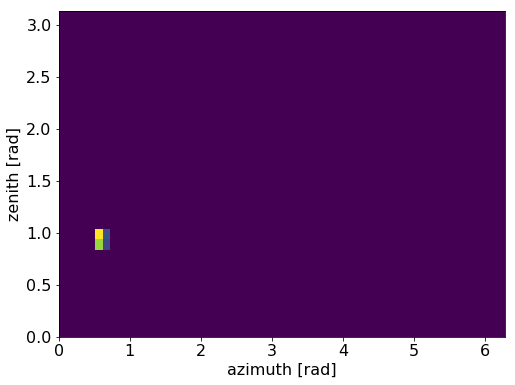

In [12]:
plt.pcolormesh(test.l_edges,test.b_edges,test.rsp.mapping_function[218,:,:])
plt.xlabel('azimuth [rad]')
plt.ylabel('zenith [rad]')

In [13]:
test.rsp.response_grid_normed.shape

(30, 60, 30, 1145, 10, 10)

Text(0, 0.5, 'zenith [rad]')

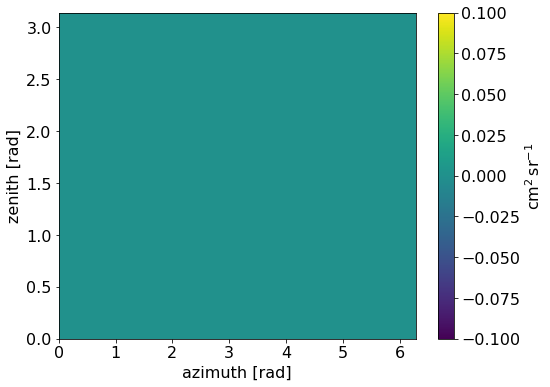

In [18]:
plt.pcolormesh(test.l_edges,test.b_edges,test.rsp.response_grid_normed[:,:,5,180,2,0])
plt.colorbar(label=r'$\mathrm{cm^2\,sr^{-1}}$')
plt.xlabel('azimuth [rad]')
plt.ylabel('zenith [rad]')

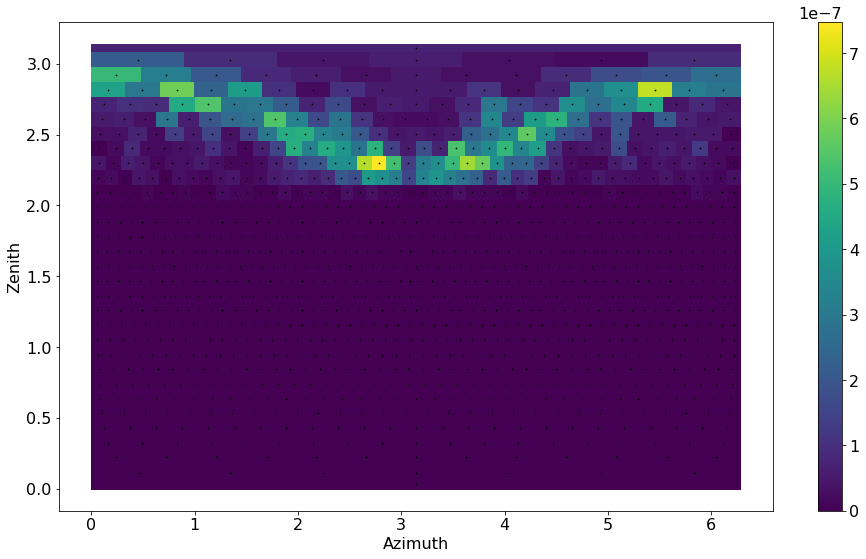

In [21]:
test.rsp.fisbels.plot_FISBEL_tessellation(tiles=True,
                                          values=(test.rsp.response[30,5,:,2,2]/(test.total_simulated_counts/(4*np.pi))*test.simulation_start_area),
                                          colorbar=True)

In [22]:
np.sum(test.fisbel_area)

12.566369999999623

In [23]:
np.sum(test.regular_pixel_area)

12.566370614359172

In [25]:
np.sum(test.rsp.response[:,5,180,2,2]/(test.total_simulated_counts/(4*np.pi))*test.simulation_start_area)

9.087917780998428e-06

In [26]:
np.sum(test.rsp.response_grid_normed[:,:,5,180,2,2]*test.regular_pixel_area)

9.087917780998428e-06

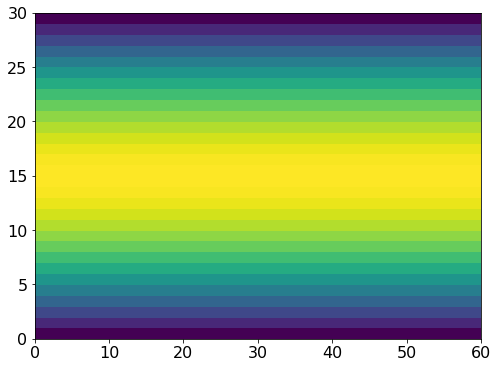

In [27]:
plt.pcolormesh(test.regular_pixel_area)

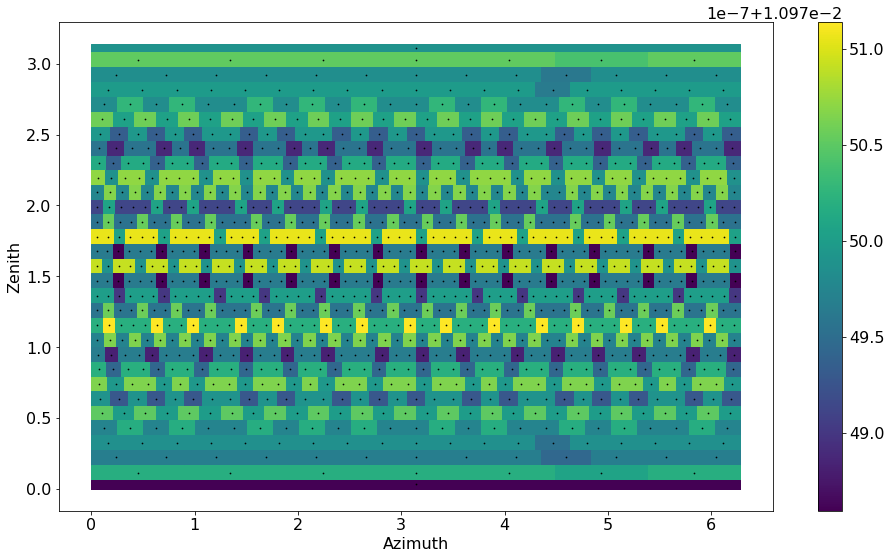

In [28]:
test.rsp.fisbels.plot_FISBEL_tessellation(tiles=True,
                                          values=np.array(test.fisbel_area),
                                          colorbar=True)

In [29]:
np.sum(test.rsp.response_grid_normed)

449.02516648287946

In [30]:
test.rsp.response_grid_normed.shape

(30, 60, 30, 1145, 10, 10)

In [31]:
tmp = np.sum(test.rsp.response_grid_normed,axis=4)

In [32]:
tmp.shape

(30, 60, 30, 1145, 10)

Text(0, 0.5, 'zenith [rad]')

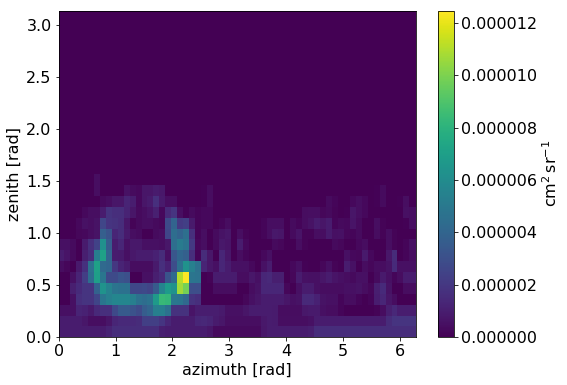

In [45]:
plt.pcolormesh(test.l_edges,test.b_edges,tmp[:,:,5,180,9])
plt.colorbar(label=r'$\mathrm{cm^2\,sr^{-1}}$')
plt.xlabel('azimuth [rad]')
plt.ylabel('zenith [rad]')

In [46]:
energy_bins = np.logspace(np.log10(130),np.log10(2500),10)

In [47]:
energy_bins

array([ 130.        ,  180.55505316,  250.77020941,  348.29098839,
        483.73613789,  671.85387765,  933.1277892 , 1296.00721222,
       1800.00500848, 2500.        ])

In [48]:
def find_nearest(array, value):
    """
    Find nearest index for value in array (where for non-existent values)
    :param: array   Input array
    :param: value   value to search for
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [49]:
[find_nearest(test.e_cen,erg) for erg in energy_bins]

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [50]:
test.e_edges
#print(test.e_cen)

array([ 150,  220,  325,  480,  520,  765, 1120, 1650, 2350, 3450, 5000])

In [51]:
print(energy_bins)
print((energy_bins - test.e_cen[[find_nearest(test.e_cen,erg) for erg in energy_bins]]))


[ 130.          180.55505316  250.77020941  348.29098839  483.73613789
  671.85387765  933.1277892  1296.00721222 1800.00500848 2500.        ]
[ -55.           -4.44494684  -21.72979059  -54.20901161  -16.26386211
   29.35387765   -9.3722108   -88.99278778 -199.99499152 -400.        ]


Text(0, 0.5, 'Initial Energy [keV]')

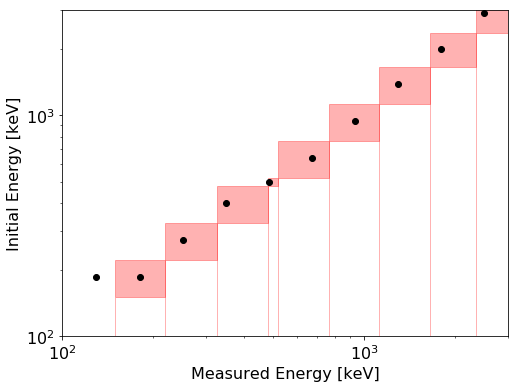

In [53]:
for i in range(len(energy_bins)):
    plt.plot(energy_bins[i],test.e_cen[find_nearest(test.e_cen,energy_bins[i])],'ko',label='Analysis Bins')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,3000)
plt.ylim(100,3000)

for i in range(test.n_e):
    plt.fill_between([test.e_min[i],test.e_min[i],test.e_max[i],test.e_max[i],test.e_min[i]],
                     [test.e_min[i],test.e_max[i],test.e_max[i],test.e_min[i],test.e_min[i]],color='red',alpha=0.3)
    
plt.xlabel('Measured Energy [keV]')
plt.ylabel('Initial Energy [keV]')
#plt.legend()

In [54]:
test.e_cen

array([ 185. ,  272.5,  402.5,  500. ,  642.5,  942.5, 1385. , 2000. ,
       2900. , 4225. ])

In [36]:
tmp = np.sum(test.rsp.response_grid_normed,axis=(0,1,2,3))

In [37]:
test.rsp.response_grid_normed[0,29,:,:,:,:].shape

(30, 1145, 3, 3)

In [71]:
tmp = np.sum(test.rsp.response_grid_normed[:,:,:,:,:,:],axis=(0,1,2,3))

In [72]:
tmp.shape

(10, 10)

In [73]:
tmp

array([[1.99258477e-01, 3.79504332e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.06461660e-01, 2.21933087e+00, 1.99198507e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.60911958e-01, 1.13319046e+00, 7.60218066e+00, 4.25551205e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.11591052e-02, 3.05392364e-01, 7.31089392e-01, 2.14866243e+00,
        4.68215093e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.46406457e-01, 1.08781733e+00, 4.84108223e+00, 1.67911952e+00,
        1.79366094e+01, 5.72603380e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.47728768e-01, 9.58184221e-01, 3.06569698e+00, 1.16853540e+00,
   

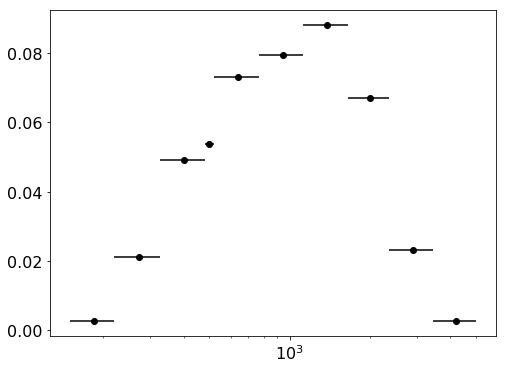

In [74]:
plt.errorbar(test.e_cen,np.diag(tmp)/test.e_wid,xerr=test.e_wid/2,marker='o',linestyle='')
plt.xscale('log')
#plt.xlim(150,2500)

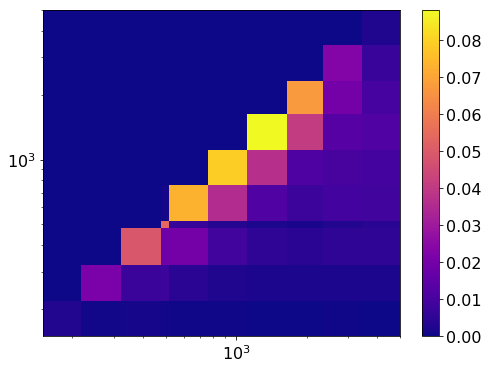

In [75]:
plt.pcolormesh(test.e_edges,test.e_edges,tmp.T/(test.e_wid),
              cmap=plt.cm.plasma)
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
#plt.xlim(100,5000)
#plt.ylim(100,5000)

In [76]:
from matplotlib import ticker, cm
import scipy.interpolate as interpol

In [77]:
def powerlaw(energy, p):
    """
    Returns:
    Differential flux shaped as power-law function "in units of ph/cm2/s/keV"
    
    Parameters:
    :param energy: 1D-array of energies where power-law is evaluated (in keV)
    :param p:      p[0] = Normalisation (in ph/cm2/s/keV)
    :param p:      p[1] = Power-law index (unitless)

    Misc:
    E0             Pivotal energy, i.e. where the power-law is normalised at (in keV)
    """
    
    E0 = 100.
    
    return p[0]*np.power(energy/E0,p[1])

In [78]:
def cutoff_powerlaw(energy,p):
    """
    Returns:
    Differential flux shaped as power-law function with high-energy
    cut-off "in units of ph/cm2/s/keV"
    
    Parameters:
    :param energy: 1D-array of energies where power-law is evaluated (in keV)
    :param p:      p[0] = Normalisation (in ph/cm2/s/keV)
    :param p:      p[1] = Power-law index (unitless)
    :param p:      p[2] = Cut-off energy (in keV)

    Misc:
    E0             Pivotal energy, i.e. where the power-law is normalised at (in keV)
    """
    
    E0 = 100.
    
    return p[0]*np.power(energy/E0,p[1])*np.exp(-energy/p[2])

In [79]:
def Gaussian(energy,p):
    """
    Returns:
    Differential flux shaped as symmetric Gaussian "in units of ph/cm2/s/keV"
    
    Parameters:
    :param energy: 1D-array of energies where power-law is evaluated (in keV)
    :param p:      p[0] = Normalisation (area under Gaussian) (in ph/cm2/s)
    :param p:      p[1] = Line centroid (in keV)
    :param p:      p[2] = Line width (1-sigma value) (in keV)
    """    

    return p[0]/(np.sqrt(2*np.pi)*p[2])*np.exp(-(energy-p[1])**2/(2*p[2]**2))

In [80]:
x = np.linspace(10,10001,100000)

In [81]:
pl = powerlaw(x,(1e-4,-2))
copl = cutoff_powerlaw(x,(1e-4,-2,4e3))

In [82]:
# integral of the differential flux
# here, we use Simpson's 3/8 rule as it provides very accurate on this scale;
# if, however, the models can change abruptly, consider the true integral, if available

def integrate_gaussian(e_lo,e_hi,p):
    return (e_hi-e_lo)/6.0*(Gaussian(e_lo,p)+4*Gaussian((e_hi+e_lo)/2.0,p)+Gaussian(e_hi,p))

def integrate_powerlaw(e_lo,e_hi,p):
    return (e_hi-e_lo)/6.0*(powerlaw(e_lo,p)+4*powerlaw((e_hi+e_lo)/2.0,p)+powerlaw(e_hi,p))

In [83]:
plaw_true_fluxes = integrate_powerlaw(test.e_min, test.e_max, (1e-4,-2))  # dNp/(dt dA) 

In [84]:
plaw_true_fluxes

array([2.12309104e-03, 1.46993231e-03, 9.94535254e-04, 1.60256684e-04,
       6.16450426e-04, 4.14692654e-04, 2.87062526e-04, 1.80645135e-04,
       1.35798232e-04, 8.99252528e-05])

In [85]:
plaw_folded_counts = np.dot(plaw_true_fluxes, tmp)*3600 #/ test.e_wid

In [86]:
plaw_folded_counts

array([ 3.90613351, 23.94097937, 53.24004806, 12.01285524, 78.05975364,
       77.95386414, 80.13863111, 46.26905415, 16.17556172,  1.34116888])

In [87]:
len(test.rsp.response_grid_normed.shape)

6

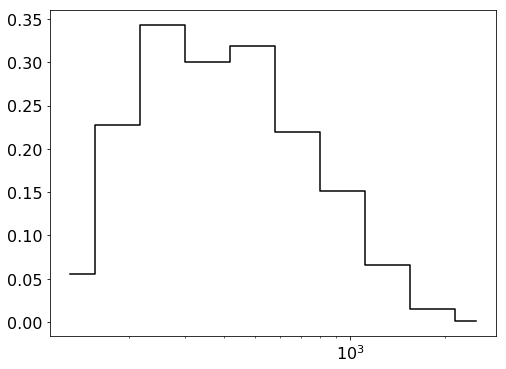

In [93]:
plt.step(energy_bins,plaw_folded_counts/test.e_wid,where='mid')
plt.xscale('log')

In [88]:
#################################################################
# note to myself:
# next step: saving an loading of response with matrix included
#################################################################

In [ ]:
test.SaveRegularBinnedMEGAlibResponse('response/RegularResponseGrid_v1.npz')

In [ ]:
"""np.savez_compressed('response/RegularResponseGrid_v1.npz',
                   ResponseGrid = test.rsp.response_grid_normed,
                   l_cen = test.l_cen,
                   l_wid = test.l_wid,
                   l_edges = test.l_edges,
                   l_max = test.l_max,
                   l_min = test.l_min,
                   b_cen = test.b_cen,
                   b_wid = test.b_wid,
                   b_edges = test.b_edges,
                   b_max = test.b_max,
                   b_min = test.b_min,
                   L_ARR = test.L_ARR,
                   B_ARR = test.B_ARR,
                   L_ARR_edges = test.L_ARR_edges,
                   B_ARR_edges = test.B_ARR_edges,
                   dL_ARR = test.dL_ARR,
                   dB_ARR = test.dB_ARR,
                   dL_ARR_edges = test.dL_ARR_edges,
                   dB_ARR_edges = test.dB_ARR_edges,
                   dOmega = test.regular_pixel_area)"""

In [ ]:
test.rsp.response_grid_normed.shape

In [ ]:
(test.rsp.response_grid_normed.size * test.rsp.response_grid_normed.itemsize)/1024/1024/1024

In [ ]:
# this file is ~ 1 GB in size
with np.load('../response/ResponseGrid511_v3.npz',) as content:
    ResponseGrid1 = content['response_grid_normed']
    l3cen = content['l3cen']
    b3cen = content['b3cen']
    l3wid = content['l3wid']
    b3wid = content['b3wid']
    L3 = content['L3']
    B3 = content['B3']

In [ ]:
np.sum(ResponseGrid1)

In [ ]:
ResponseGrid1.shape

In [ ]:
break

In [ ]:
test = response.SkyResponse('response/RegularResponseGrid_v1.npz',
                            pixel_size=5)
plt.pcolormesh(test.rsp.response_grid_normed[:,:,5,180])

In [ ]:
test.n_b